# Telco Customer Churn Prediction

In [68]:
# Importing libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

## Get the data

In [69]:
data_path = "../artifacts/data"
files = os.listdir(data_path)
files
for file in files:
    file_name = os.path.splitext(file)[0]
    globals()[f'{file_name}_df'] = pd.read_excel(os.path.join(data_path, file))

df_s = [
    
    Telco_customer_churn_df,

    Telco_customer_churn_demographics_df,

    Telco_customer_churn_location_df,
    
    Telco_customer_churn_population_df,
    
    Telco_customer_churn_services_df,
    
    Telco_customer_churn_services_df,
    
    CustomerChurn_df
]

## Data Analysis and EDA/Visualization

In [70]:
Telco_customer_churn_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [71]:
Telco_customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [72]:
# Investigating all categorical values in the dataset
categorical_data = []
for column in Telco_customer_churn_df:
    value_counts = pd.value_counts(Telco_customer_churn_df[column])
    value_counts_len = len(value_counts.index.to_list())

    if value_counts_len < 10 and value_counts_len!=1:
        categorical_data.append(column)
        print(f"Unique values for column '{column}' : {value_counts.index.to_list()} having len {value_counts_len}")

Unique values for column 'Gender' : ['Male', 'Female'] having len 2
Unique values for column 'Senior Citizen' : ['No', 'Yes'] having len 2
Unique values for column 'Partner' : ['No', 'Yes'] having len 2
Unique values for column 'Dependents' : ['No', 'Yes'] having len 2
Unique values for column 'Phone Service' : ['Yes', 'No'] having len 2
Unique values for column 'Multiple Lines' : ['No', 'Yes', 'No phone service'] having len 3
Unique values for column 'Internet Service' : ['Fiber optic', 'DSL', 'No'] having len 3
Unique values for column 'Online Security' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Online Backup' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Device Protection' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Tech Support' : ['No', 'Yes', 'No internet service'] having len 3
Unique values for column 'Streaming TV' : ['No', 'Yes', 'No internet service'] having len 3
Unique value

In [73]:
# Telco_customer_churn_df_copy = Telco_customer_churn_df.copy().fillna(''),
# Telco_customer_churn_demographics_df_copy = Telco_customer_churn_demographics_df.copy().fillna(''),
# Telco_customer_churn_location_df_copy = Telco_customer_churn_location_df.copy().fillna(''),
# Telco_customer_churn_population_df_copy = Telco_customer_churn_population_df.copy().fillna(''),
# Telco_customer_churn_services_df_copy = Telco_customer_churn_services_df.copy().fillna(''),
# Telco_customer_churn_services_df_copy = Telco_customer_churn_services_df.copy().fillna(''),

# df_s = [
#     Telco_customer_churn_df_copy,
#     Telco_customer_churn_demographics_df_copy,
#     Telco_customer_churn_location_df_copy,
#     Telco_customer_churn_population_df_copy,
#     Telco_customer_churn_services_df_copy,
#     Telco_customer_churn_services_df_copy
# ]
# os.makedirs("./df_info", exist_ok=True)
# count = 0
# for df in enumerate(df_s):
#     file_path = f'./df_info/{count}.txt'
#     count+=1
#     info_str = df.info(buf=None)
#     with open(file_path, "w") as f:
#         f.write(info_str)

In [74]:
# The 5 df's (subset of telco_churn) demographics/location etc. are to be dealt with.
categorical_data

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label',
 'Churn Value']

#### Categorical Data

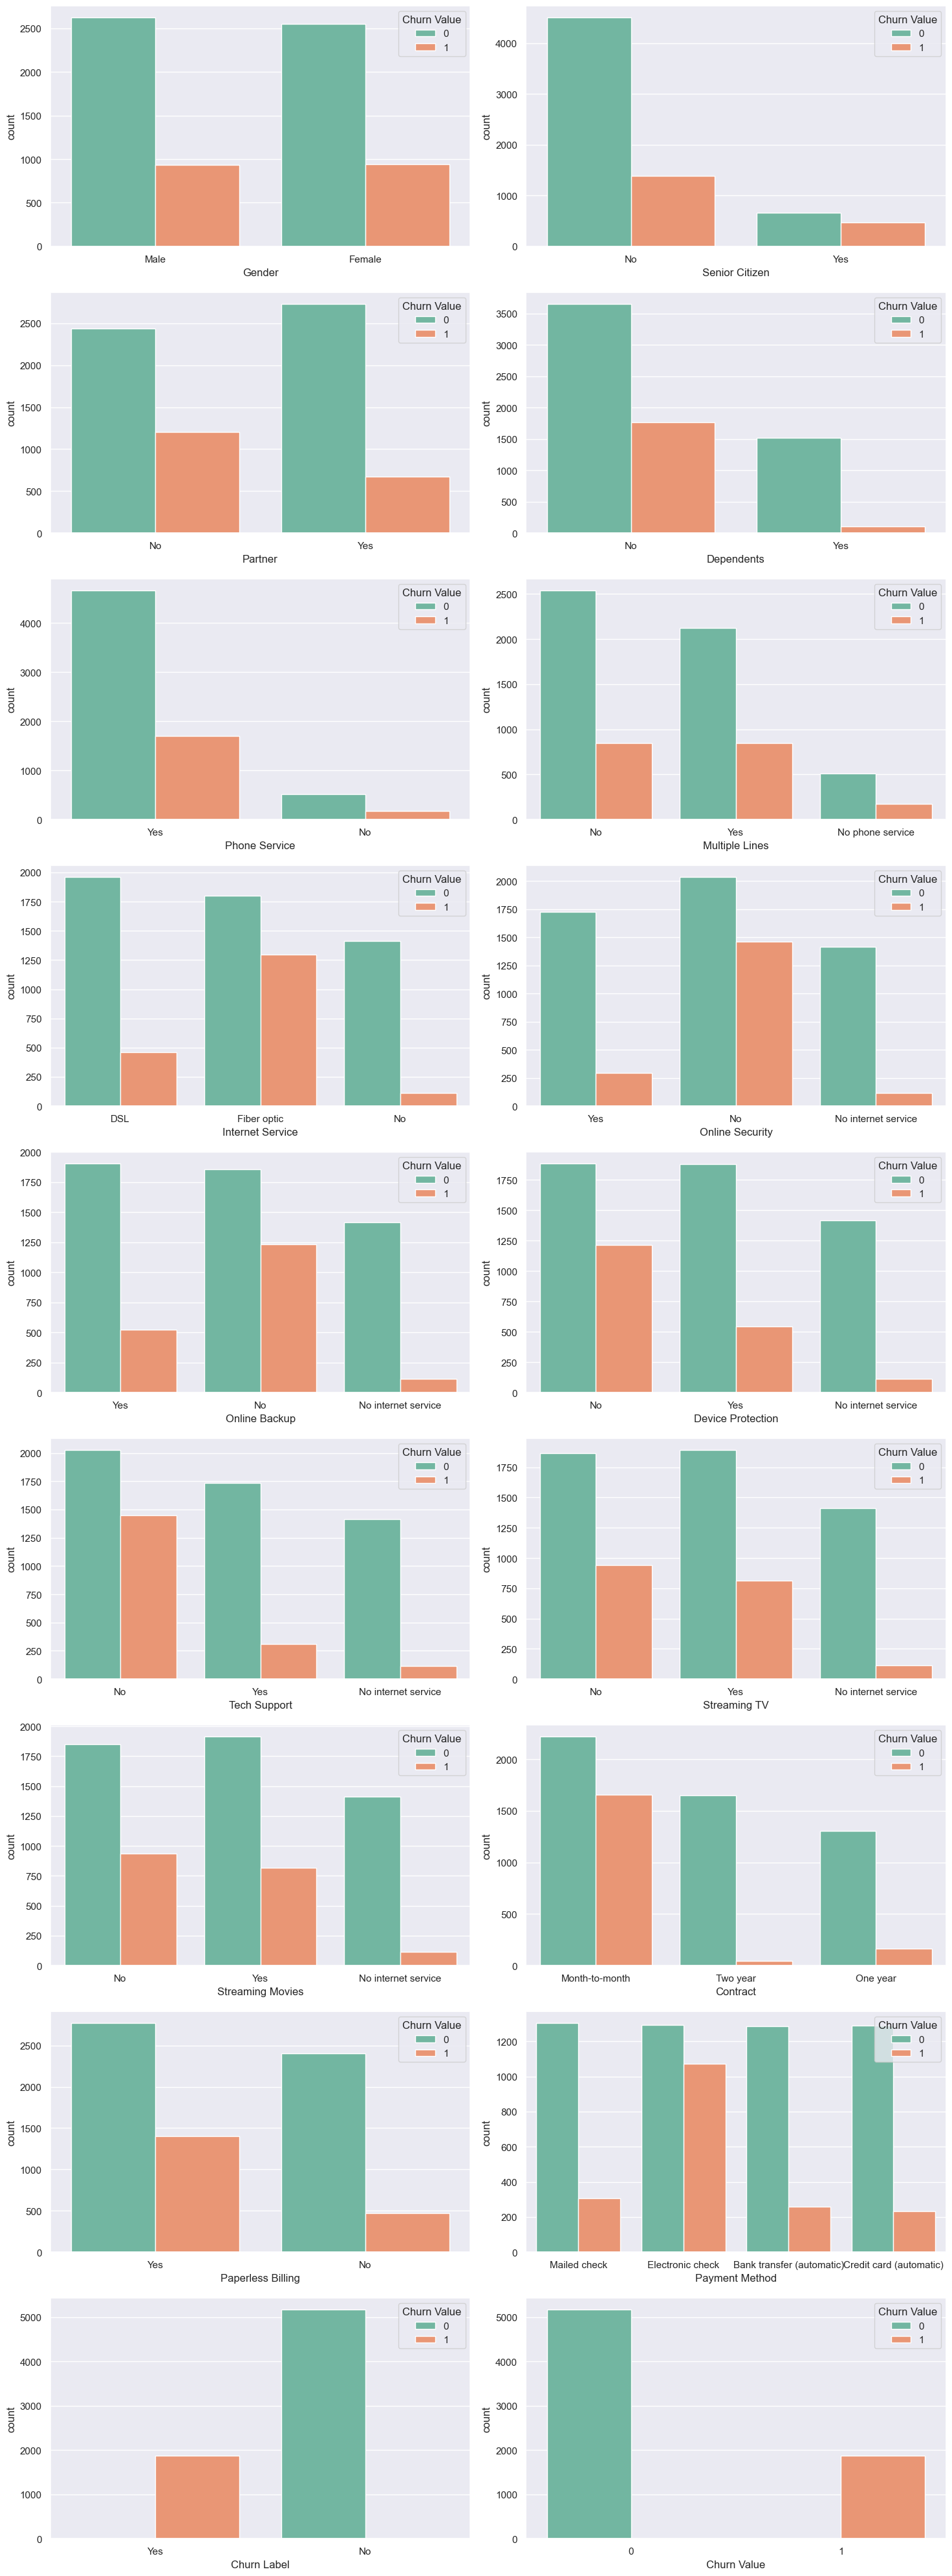

In [75]:
# Custom plot
fig, axes = plt.subplots(9,2, figsize=(15,40))
axes = axes.flatten()
for i in range(len(categorical_data)):
    features = categorical_data[i]
    sns.countplot(x=features, data=Telco_customer_churn_df, palette = 'Set2', ax=axes[i], hue='Churn Value')

plt.tight_layout()
plt.show()

#### Continous Data

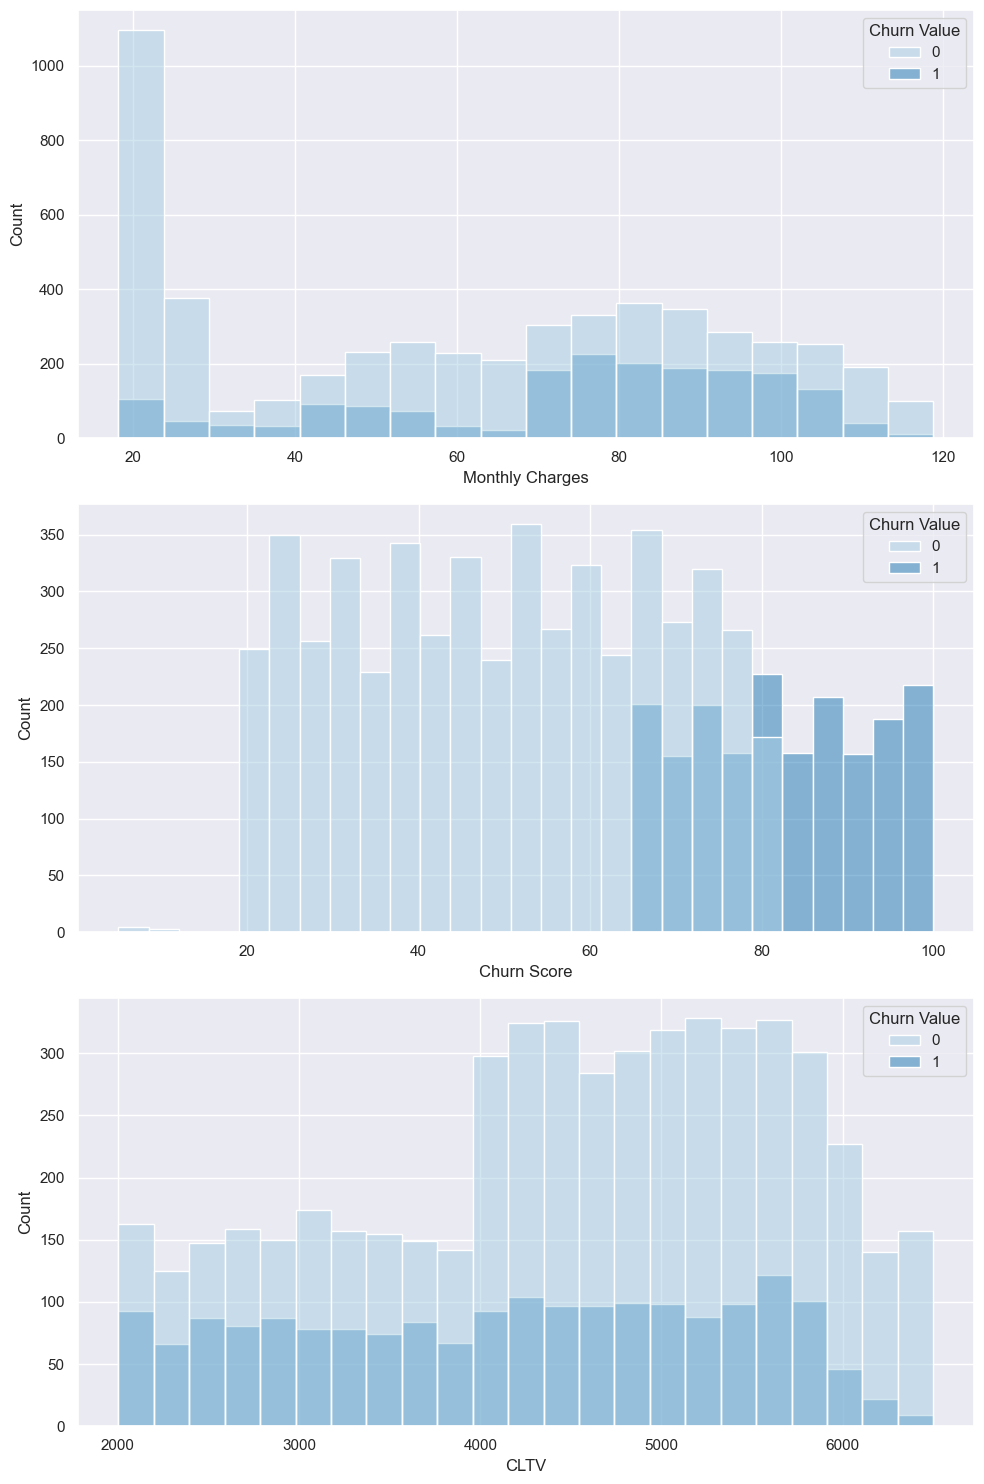

In [76]:
continous_data = ['Monthly Charges', 'Churn Score', 'CLTV']
fig, axes = plt.subplots(3,1, figsize=(10,15))
axes = axes.flatten()
for i in range(len(continous_data)):
    features = continous_data[i]
    sns.histplot(x=features, data=Telco_customer_churn_df, ax=axes[i], palette='Paired', hue='Churn Value')
plt.tight_layout()
plt.show()

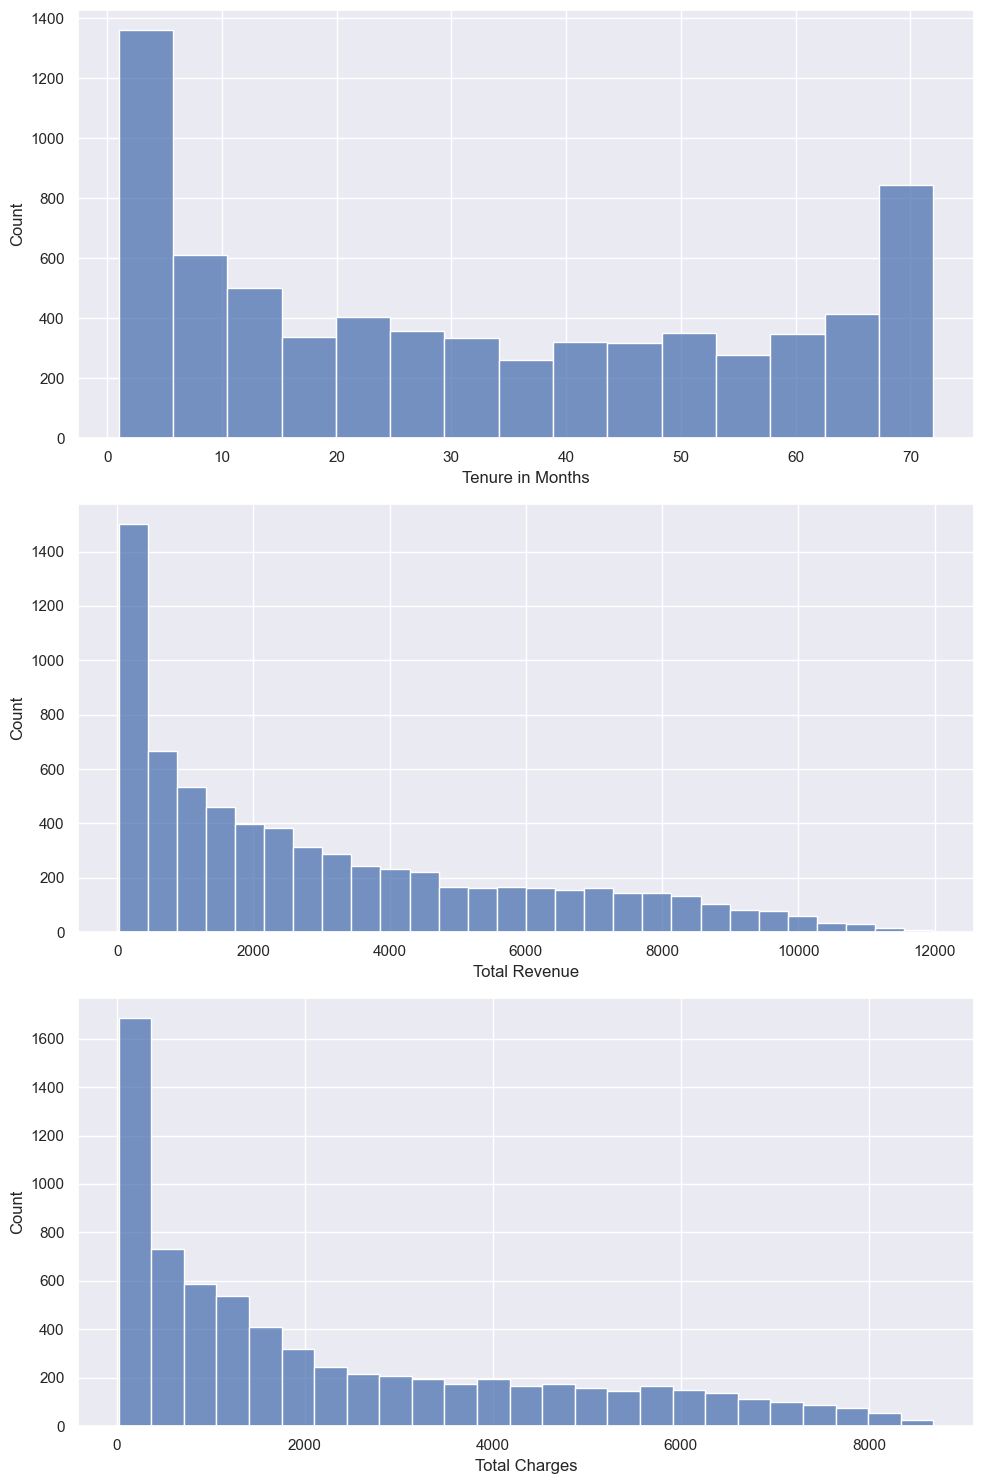

In [77]:
continous_data = ['Tenure in Months', 'Total Revenue', 'Total Charges']
fig, axes = plt.subplots(3,1, figsize=(10,15))
axes = axes.flatten()
for i in range(len(continous_data)):
    features = continous_data[i]
    sns.histplot(x=features, data=Telco_customer_churn_services_df, ax=axes[i])
plt.tight_layout()
plt.show()

#### Number of Dependents

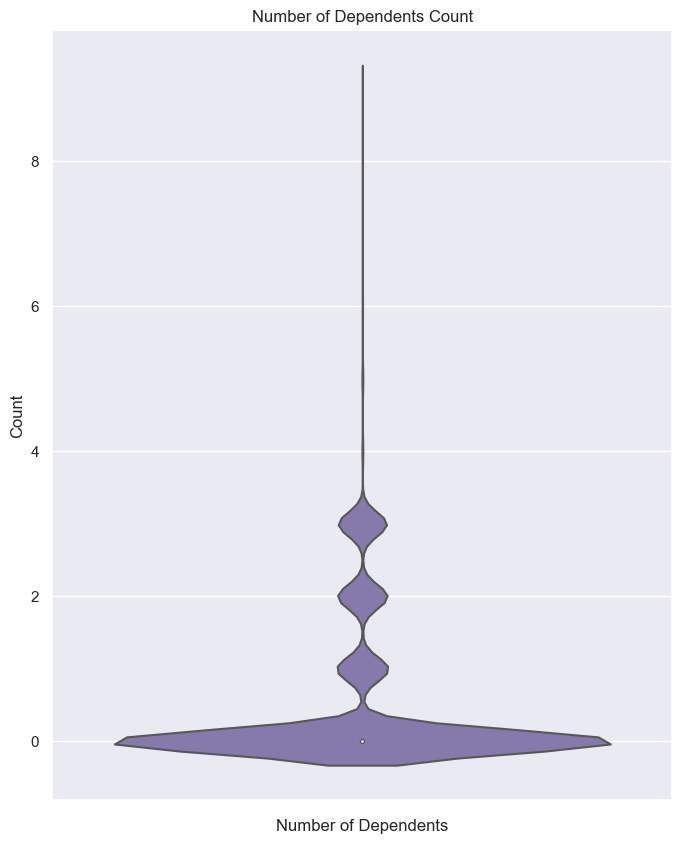

In [78]:
plt.figure(figsize=(8,10))
sns.violinplot(Telco_customer_churn_demographics_df, y='Number of Dependents', color='m')
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.title("Number of Dependents Count")
plt.show()

In [79]:
# Distribution of People around the city.
fig = px.scatter_mapbox(
    Telco_customer_churn_df,
    lat = 'Latitude',
    lon = 'Longitude',
    color = 'Churn Score',
    hover_name = 'Churn Value',
    # size = 'Churn Value',
    zoom = 5, 
    height = 800,
    width = 800
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

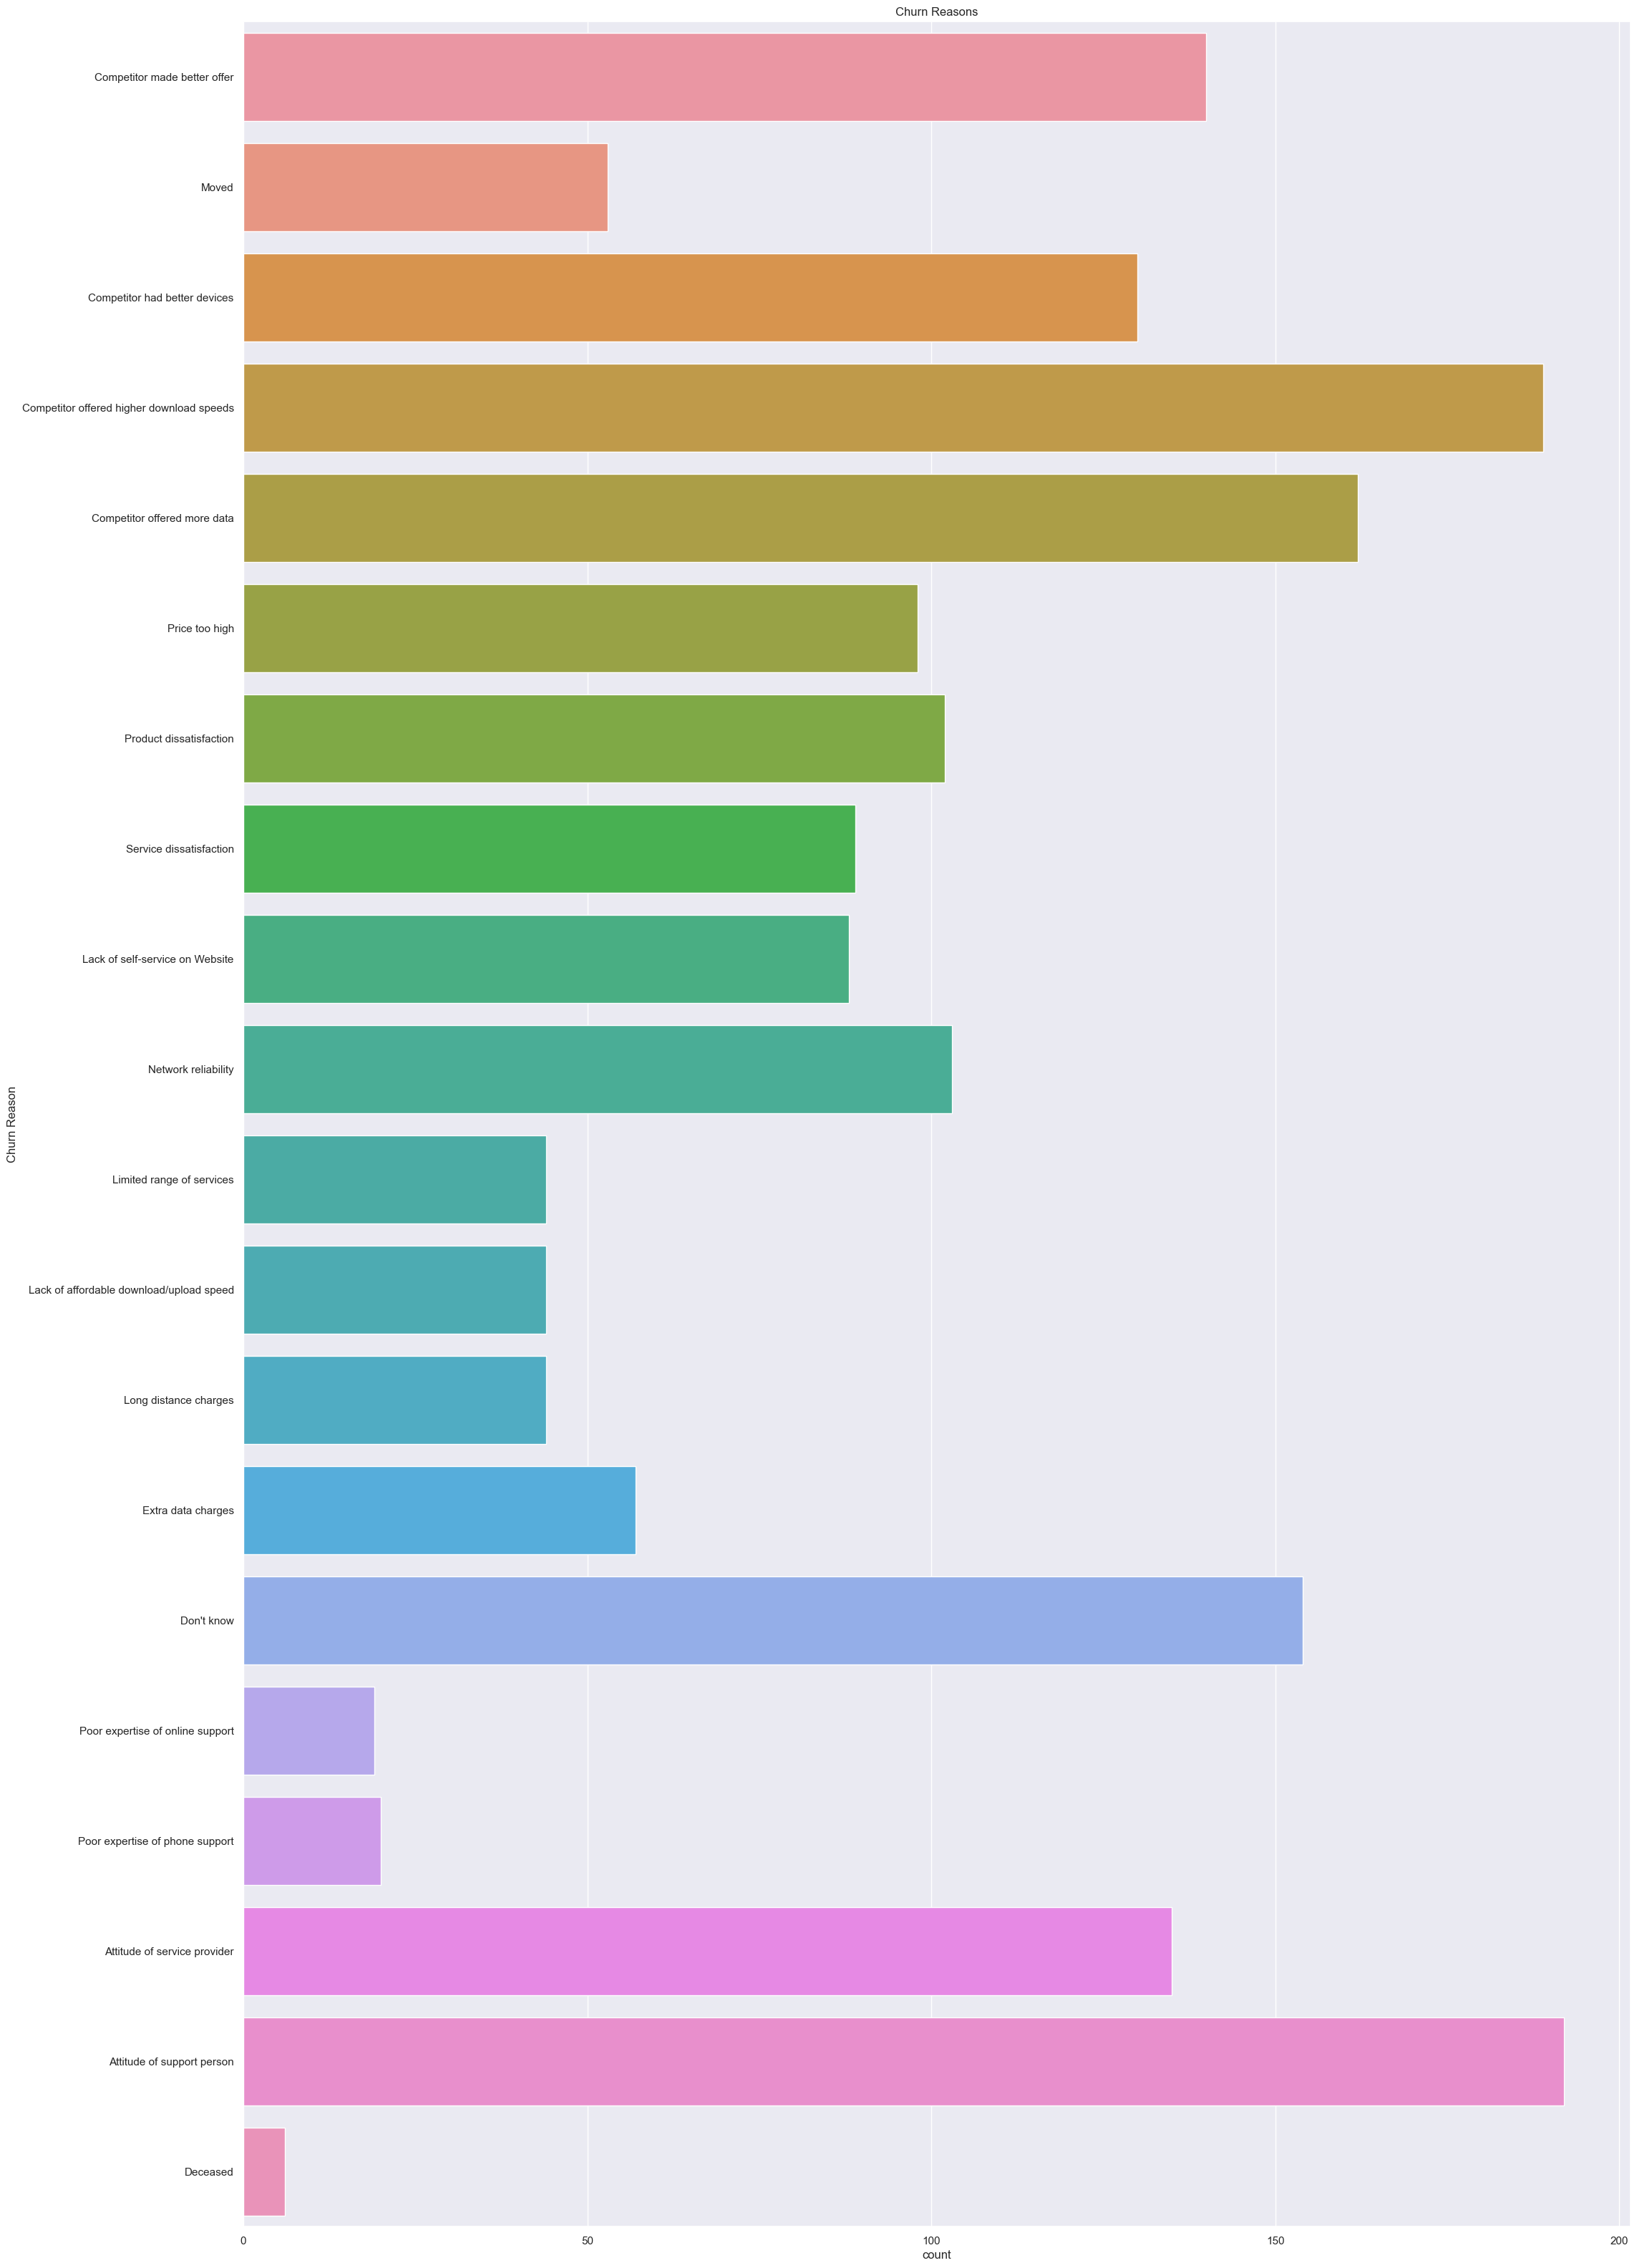

In [80]:
# Reason for churn -> most imp to analyze
plt.figure(figsize=(25,40))
sns.countplot(y='Churn Reason', data=Telco_customer_churn_df)
# plt.legend()
plt.title("Churn Reasons")
sns.set(font_scale=5)
# plt.tight_layout()
plt.show()

## Feature Engineering

In [81]:
# Categorical Data -> LabelEncoder()
df = Telco_customer_churn_df.copy()
label_encoder = LabelEncoder()
categorical_features = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
    'Internet Service','Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
    'Streaming TV', 'Streaming Movies', 'Contract','Paperless Billing', 'Payment Method', 'Churn Value'
]

for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])
    print(col,' : ',df[col].unique(),' = ',label_encoder.inverse_transform(df[col].unique()))


Gender  :  [1 0]  =  ['Male' 'Female']
Senior Citizen  :  [0 1]  =  ['No' 'Yes']
Partner  :  [0 1]  =  ['No' 'Yes']
Dependents  :  [0 1]  =  ['No' 'Yes']
Phone Service  :  [1 0]  =  ['Yes' 'No']
Multiple Lines  :  [0 2 1]  =  ['No' 'Yes' 'No phone service']
Internet Service  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
Online Security  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
Online Backup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
Device Protection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Tech Support  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Streaming TV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Streaming Movies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 2 1]  =  ['Month-to-month' 'Two year' 'One year']
Paperless Billing  :  [1 0]  =  ['Yes' 'No']
Payment Method  :  [3 2 0 1]  =  ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Value  :  [1 0]  =  [1 0]


In [82]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,0,1,3,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,0,...,0,1,2,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,0,...,0,1,2,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,0,...,0,1,2,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,1,...,0,1,0,103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### Correlation Heatmap{Matrix}

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   int32  
 10  Senior Citizen     7043 non-null   int32  
 11  Partner            7043 non-null   int32  
 12  Dependents         7043 non-null   int32  
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   int32  
 15  Multiple Lines     7043 non-null   int32  
 16  Internet Service   7043 

In [84]:
df.drop(['CustomerID', 'Lat Long', 'Churn Reason', 'Country', 'State', 'City', 'Zip Code', 'Churn Label', 'Count'], axis=1, inplace=True)

In [85]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [86]:
df.dropna(axis=0, inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           7032 non-null   float64
 1   Longitude          7032 non-null   float64
 2   Gender             7032 non-null   int32  
 3   Senior Citizen     7032 non-null   int32  
 4   Partner            7032 non-null   int32  
 5   Dependents         7032 non-null   int32  
 6   Tenure Months      7032 non-null   int64  
 7   Phone Service      7032 non-null   int32  
 8   Multiple Lines     7032 non-null   int32  
 9   Internet Service   7032 non-null   int32  
 10  Online Security    7032 non-null   int32  
 11  Online Backup      7032 non-null   int32  
 12  Device Protection  7032 non-null   int32  
 13  Tech Support       7032 non-null   int32  
 14  Streaming TV       7032 non-null   int32  
 15  Streaming Movies   7032 non-null   int32  
 16  Contract           7032 non-n

In [88]:
corr_matrix = df.corr()
corr_matrix["Churn Value"].sort_values(ascending=False).to_frame()

,Churn Value
Churn Value,1.000000
Churn Score,0.664970
Monthly Charges,0.192858
Paperless Billing,0.191454
Senior Citizen,0.150541
Payment Method,0.107852
Multiple Lines,0.038043
Phone Service,0.011691
Longitude,0.004693
Latitude,-0.003600


<Axes: >

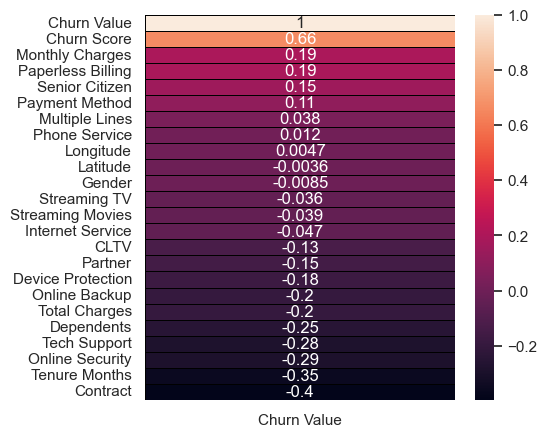

In [89]:
plt.figure(figsize = (5,5))
sns.set(font_scale=1)
sns.heatmap(corr_matrix["Churn Value"].sort_values(ascending=False).to_frame(), annot = True,linewidths = 0.4,linecolor = 'black')

Chi SQuare Test for Feature Selection

In [90]:
chi_cat_features = df.loc[:,categorical_features]
chi_target = df.loc[:,'Churn Value']
best_features_chi = SelectKBest(score_func=chi2, k='all')
features_fit_chi = best_features_chi.fit(chi_cat_features, chi_target)
features_score_chi = pd.DataFrame(data=features_fit_chi.scores_, index=list(chi_cat_features.columns), columns=['Chi Squared Score'])
features_score_chi

,Chi Squared Score
Gender,0.254297
Senior Citizen,133.482766
Partner,81.857769
Dependents,333.236458
Phone Service,0.092948
Multiple Lines,9.735960
Internet Service,9.715269
Online Security,550.437364
Online Backup,229.441123
Device Protection,190.688004


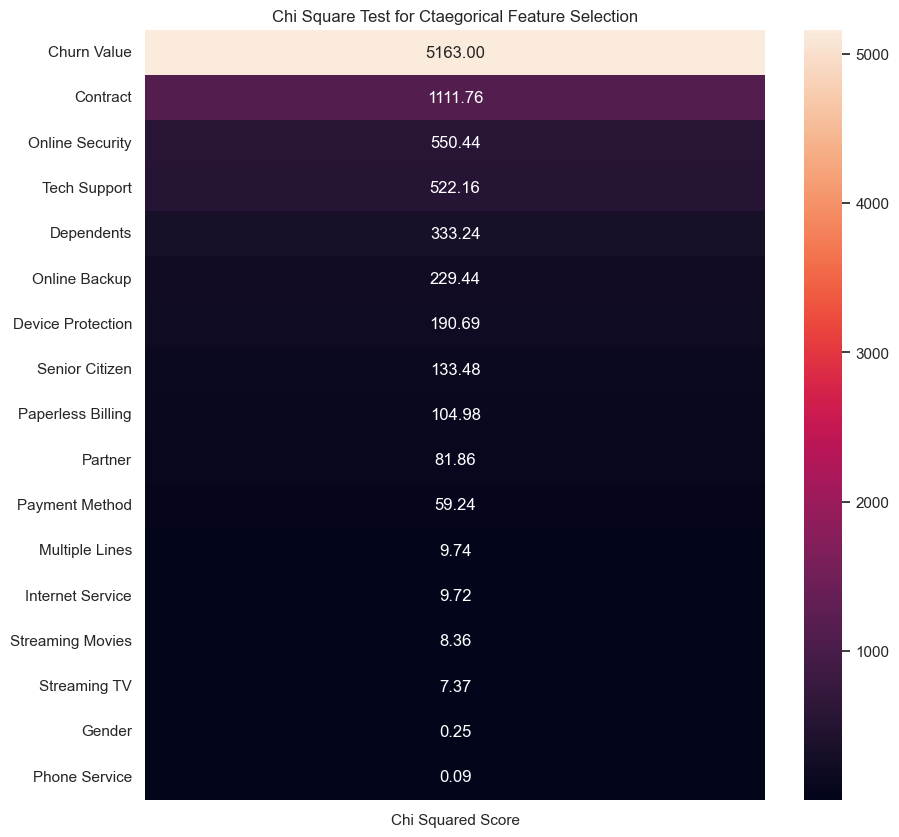

In [91]:
plt.figure(figsize=(10,10))
sns.heatmap(features_score_chi.sort_values(ascending = False,by = 'Chi Squared Score'), annot=True, fmt = '.2f')
plt.title("Chi Square Test for Ctaegorical Feature Selection")
plt.show()

In [92]:
dummy_cat_features = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
    'Internet Service','Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
    'Streaming TV', 'Streaming Movies', 'Contract','Paperless Billing', 'Payment Method'
]
df = pd.get_dummies(df, columns=dummy_cat_features, drop_first=True)
df.head()

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_1,Senior Citizen_1,...,Streaming TV_1,Streaming TV_2,Streaming Movies_1,Streaming Movies_2,Contract_1,Contract_2,Paperless Billing_1,Payment Method_1,Payment Method_2,Payment Method_3
0,33.964131,-118.272783,2,53.85,108.15,1,86,3239,True,False,...,False,False,False,False,False,False,True,False,False,True
1,34.059281,-118.307420,2,70.70,151.65,1,67,2701,False,False,...,False,False,False,False,False,False,True,False,True,False
2,34.048013,-118.293953,8,99.65,820.50,1,86,5372,False,False,...,False,True,False,True,False,False,True,False,True,False
3,34.062125,-118.315709,28,104.80,3046.05,1,84,5003,False,False,...,False,True,False,True,False,False,True,False,True,False
4,34.039224,-118.266293,49,103.70,5036.30,1,89,5340,True,False,...,False,True,False,True,False,False,True,False,False,False


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Latitude             7032 non-null   float64
 1   Longitude            7032 non-null   float64
 2   Tenure Months        7032 non-null   int64  
 3   Monthly Charges      7032 non-null   float64
 4   Total Charges        7032 non-null   float64
 5   Churn Value          7032 non-null   int64  
 6   Churn Score          7032 non-null   int64  
 7   CLTV                 7032 non-null   int64  
 8   Gender_1             7032 non-null   bool   
 9   Senior Citizen_1     7032 non-null   bool   
 10  Partner_1            7032 non-null   bool   
 11  Dependents_1         7032 non-null   bool   
 12  Phone Service_1      7032 non-null   bool   
 13  Multiple Lines_1     7032 non-null   bool   
 14  Multiple Lines_2     7032 non-null   bool   
 15  Internet Service_1   7032 non-null   bool  

### Data Preparation

In [94]:
X = df.drop(['Churn Value'], axis=1).copy()
Y = df['Churn Value']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [95]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(5625, 34) (5625,)
(1407, 34) (1407,)


## Model Training

### Model Preparation

In [96]:
models = []
model_accs = []
model_precs = []
model_recalls = []
model_f1s = []


# Models used for Training
'''
    1) RandomForestClassifier(n_estimators=100, class_weight={0:1,1:3})
    2) XGBClassifier()
    3) LGBMClassifier(learning_rate=0.09,max_depth=-5,scale_pos_weight =3,
                    random_state=42, objective = 'binary')
    4) Bagging Classifier
'''

"\n    1) RandomForestClassifier(n_estimators=100, class_weight={0:1,1:3})\n    2) XGBClassifier()\n    3) LGBMClassifier(learning_rate=0.09,max_depth=-5,scale_pos_weight =3,\n                    random_state=42, objective = 'binary')\n    4) Bagging Classifier\n"

### Training

#### Random Forest Classifier

In [97]:
random_forest_clf = RandomForestClassifier(n_estimators=100, class_weight={0:1,1:3})
random_forest_clf.fit(X_train, Y_train)
Y_pred = random_forest_clf.predict(X_test)
models.append("Random Forest Classifier")
model_accs.append(accuracy_score(Y_test, Y_pred))
model_precs.append(precision_score(Y_test, Y_pred))
model_recalls.append(recall_score(Y_test, Y_pred))
model_f1s.append(f1_score(Y_test, Y_pred))

In [98]:
# Let's print the classification report

print(f"Accuracy score : {accuracy_score(Y_test, Y_pred)}")
print(f"Precision score : {precision_score(Y_test, Y_pred)}")
print(f"Recall score : {recall_score(Y_test, Y_pred)}")
print(f"F1 score : {f1_score(Y_test, Y_pred)}")
print(' ')
print(classification_report(Y_test, Y_pred))

Accuracy score : 0.9232409381663113
Precision score : 0.8727272727272727
Recall score : 0.850632911392405
F1 score : 0.8615384615384615
 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1012
           1       0.87      0.85      0.86       395

    accuracy                           0.92      1407
   macro avg       0.91      0.90      0.90      1407
weighted avg       0.92      0.92      0.92      1407



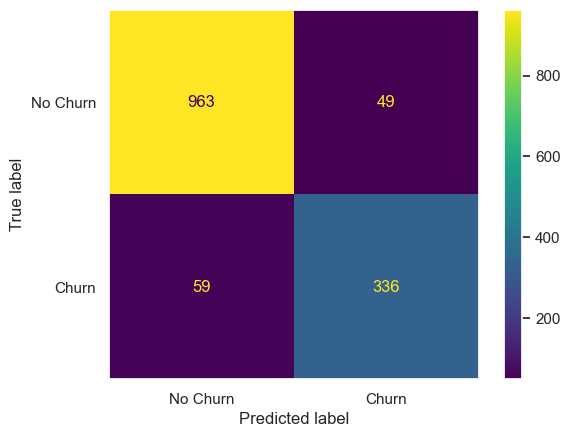

In [99]:
# Let's print the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
cm_disp = ConfusionMatrixDisplay(cm, display_labels=['No Churn', 'Churn'])
cm_disp.plot()
plt.grid(False)
plt.show()

#### XGBoost

In [100]:
xgboost = XGBClassifier()
xgboost.fit(X_train, Y_train)
Y_pred = xgboost.predict(X_test)
models.append("XGBoost")
model_accs.append(accuracy_score(Y_test, Y_pred))
model_precs.append(precision_score(Y_test, Y_pred))
model_recalls.append(recall_score(Y_test, Y_pred))
model_f1s.append(f1_score(Y_test, Y_pred))

In [101]:
# Let's print the classification report

print(f"Accuracy score : {accuracy_score(Y_test, Y_pred)}")
print(f"Precision score : {precision_score(Y_test, Y_pred)}")
print(f"Recall score : {recall_score(Y_test, Y_pred)}")
print(f"F1 score : {f1_score(Y_test, Y_pred)}")
print(' ')
print(classification_report(Y_test, Y_pred))

Accuracy score : 0.9154228855721394
Precision score : 0.8612565445026178
Recall score : 0.8329113924050633
F1 score : 0.846846846846847
 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1012
           1       0.86      0.83      0.85       395

    accuracy                           0.92      1407
   macro avg       0.90      0.89      0.89      1407
weighted avg       0.91      0.92      0.91      1407



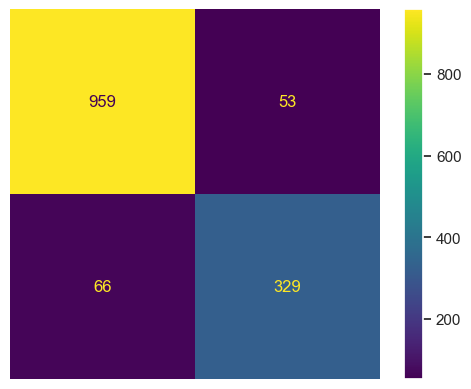

In [102]:
# Let's print the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
cm_disp = ConfusionMatrixDisplay(cm, display_labels=['No Churn', 'Churn'])
cm_disp.plot()
plt.axis(False)
plt.show()

#### Light GBM

In [103]:
lgbm = LGBMClassifier(learning_rate=0.09,max_depth=-5,scale_pos_weight =3, random_state=42, objective = 'binary')
lgbm.fit(X_train, Y_train)
Y_pred = lgbm.predict(X_test)
models.append("Light GBM")
model_accs.append(accuracy_score(Y_test, Y_pred))
model_precs.append(precision_score(Y_test, Y_pred))
model_recalls.append(recall_score(Y_test, Y_pred))
model_f1s.append(f1_score(Y_test, Y_pred))

In [104]:
# Let's print the classification report

print(f"Accuracy score : {accuracy_score(Y_test, Y_pred)}")
print(f"Precision score : {precision_score(Y_test, Y_pred)}")
print(f"Recall score : {recall_score(Y_test, Y_pred)}")
print(f"F1 score : {f1_score(Y_test, Y_pred)}")
print(' ')
print(classification_report(Y_test, Y_pred))

Accuracy score : 0.9203980099502488
Precision score : 0.8329411764705882
Recall score : 0.8962025316455696
F1 score : 0.8634146341463413
 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1012
           1       0.83      0.90      0.86       395

    accuracy                           0.92      1407
   macro avg       0.90      0.91      0.90      1407
weighted avg       0.92      0.92      0.92      1407



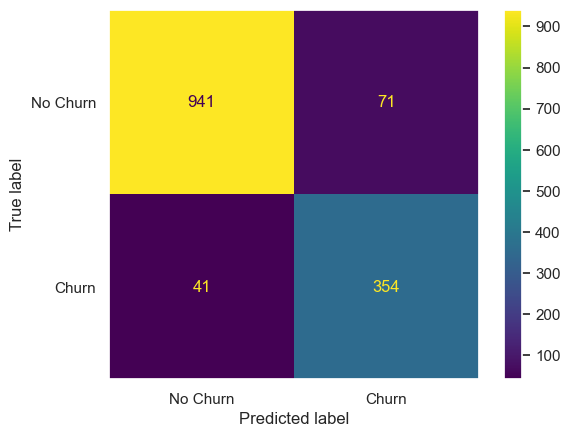

In [105]:
# Let's print the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
cm_disp = ConfusionMatrixDisplay(cm, display_labels=['No Churn', 'Churn'])
cm_disp.plot()
plt.grid(False)
plt.show()

#### Bagging Classifier

In [106]:
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=123)
bagging_clf.fit(X_train, Y_train)
Y_pred = bagging_clf.predict(X_test)

models.append("Bagging Classifier")
model_accs.append(accuracy_score(Y_test, Y_pred))
model_precs.append(precision_score(Y_test, Y_pred))
model_recalls.append(recall_score(Y_test, Y_pred))
model_f1s.append(f1_score(Y_test, Y_pred))

In [107]:
# Let's print the classification report

print(f"Accuracy score : {accuracy_score(Y_test, Y_pred)}")
print(f"Precision score : {precision_score(Y_test, Y_pred)}")
print(f"Recall score : {recall_score(Y_test, Y_pred)}")
print(f"F1 score : {f1_score(Y_test, Y_pred)}")
print(' ')
print(classification_report(Y_test, Y_pred))

Accuracy score : 0.9196872778962332
Precision score : 0.8652849740932642
Recall score : 0.8455696202531645
F1 score : 0.8553137003841228
 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1012
           1       0.87      0.85      0.86       395

    accuracy                           0.92      1407
   macro avg       0.90      0.90      0.90      1407
weighted avg       0.92      0.92      0.92      1407



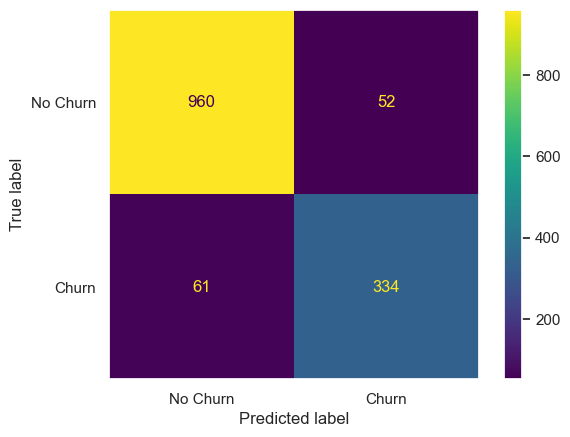

In [108]:
# Let's print the confusion matrix

cm = confusion_matrix(Y_test, Y_pred)
cm_disp = ConfusionMatrixDisplay(cm, display_labels=['No Churn', 'Churn'])
cm_disp.plot()
plt.grid(False)
plt.show()

### Evaluating Model Performances

In [109]:
model_dict = {
    'Model': models,
    'Precision': model_precs,
    'Acuuracy': model_accs,
    'Recall': model_recalls,
    'F1': model_f1s
}

models_df = pd.DataFrame(model_dict)

In [110]:
models_df

,Model,Precision,Acuuracy,Recall,F1
0,Random Forest Classifier,0.872727,0.923241,0.850633,0.861538
1,XGBoost,0.861257,0.915423,0.832911,0.846847
2,Light GBM,0.832941,0.920398,0.896203,0.863415
3,Bagging Classifier,0.865285,0.919687,0.845570,0.855314
